# Versuch 234 - Lichtquellen
#### Felix Fleischle - 10.1.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#%matplotlib qt5

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [3]:
lamb_og, inten_og=np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/234/himmel_ohne_fenster.txt',converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
lamb_mg, inten_mg=np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/234/himmel_mit_fenster.txt',converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

(250.0, 900.0)

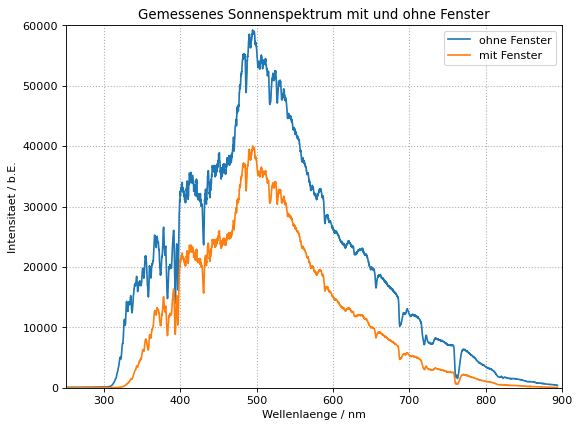

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_og, inten_og, label='ohne Fenster')
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.ylim((0,60000))
plt.xlim((250,900))
#plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

(320.0, 800.0)

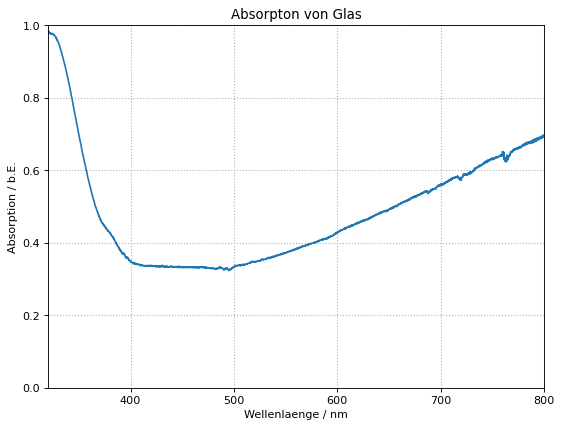

In [5]:
A=1-inten_mg/inten_og

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_mg, A)
plt.title('Absorpton von Glas')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Absorption / b.E.')
plt.grid(linestyle=":", linewidth=1)
plt.ylim((0,1))
plt.xlim((320,800))
#plt.savefig("figures/Absorption_Glas.pdf", format="pdf")

(350.0, 800.0)

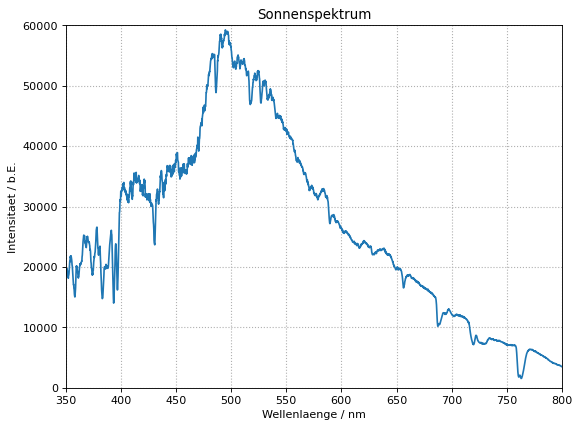

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_og, inten_og)
plt.title('Sonnenspektrum')
plt.grid(linestyle=":", linewidth=1)
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.ylim((0,60000))
plt.xlim((350,800))

In [7]:
lmbda_f_exp = np.array([393.33, 396.77, 430.40, 486.21, 517.38, 526.94, 589.99, 656.46, 687.50, 760.89, 410.27, 434.14])
lmbda_f_exp_err = np.ones(12)*0.5

#int_f_exp = np.array([1.411, 1.625, 2.373, 4.892, 4.690, 4.715, 2.718, 1.650, 1.021])*10**4
#int_f_exp_err = np.ones(10)*0.01*10**4

lmbda_f_theo = np.array([393.4, 396.8, 430.8, 486.1, 518.4, 527.0, 589.0, 656.3, 686.7, 759.4, 410.17, 434.05])

sigma_lambda_f = np.abs((lmbda_f_exp - lmbda_f_theo )/ (lmbda_f_exp_err))
print("Sigma-Abweichungen Fraunhoferlinien:", sigma_lambda_f)

Sigma-Abweichungen Fraunhoferlinien: [0.14 0.06 0.8  0.22 2.04 0.12 1.98 0.32 1.6  2.98 0.2  0.18]


## Natriumspektrum

(300.0, 850.0)

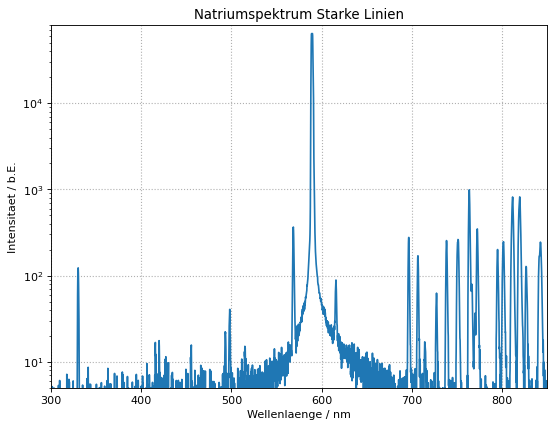

In [8]:
lamb_na_g, inten_na_g=np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/234/Natrium_geringe_Intensitaet.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_na_g, inten_na_g)
plt.title('Natriumspektrum Starke Linien')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.grid(linestyle=":", linewidth=1)
plt.ylim((5,80000))
plt.xlim((300,850))

(300.0, 540.0)

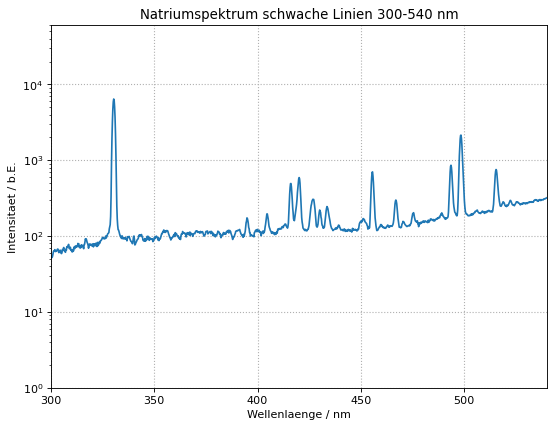

In [9]:
lamb_na_s, inten_na_s=np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/234/Natrium_hohe_Intensitaet.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_na_s, inten_na_s)
plt.title('Natriumspektrum schwache Linien 300-540 nm')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.grid(linestyle=":", linewidth=1)
plt.ylim((1,60000))
plt.xlim((300,540))

(600.0, 850.0)

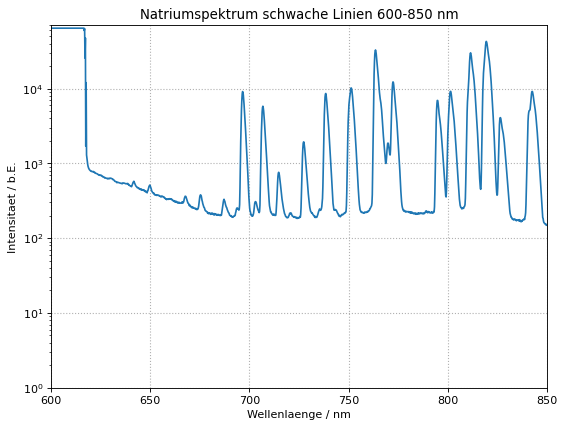

In [10]:
lamb_na_s, inten_na_s=np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/234/Natrium_hohe_Intensitaet.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(lamb_na_s, inten_na_s)
plt.title('Natriumspektrum schwache Linien 600-850 nm')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.grid(linestyle=":", linewidth=1)
plt.ylim((1,70000))
plt.xlim((600,850))

### Erste Nebenserie

In [11]:
lmbda_m3 = 819.4
lmbda_m3_err = 1.0
Ry = -13.605 #eV
hc = 1.2398*10**(3) #nmeV

E_3p = (Ry/9) - (hc / lmbda_m3)
E_3p_err = (hc * lmbda_m3_err / lmbda_m3**2)
print("Energie E_3p:", E_3p, "+-", E_3p_err, "[eV]")


for m in range(3,13):
    l=hc/(Ry/m**2-E_3p)
    l_err = hc * E_3p_err/(Ry/m**2-E_3p)**2
    print('m={m:2d}, lambda={l:6.2f}, error={l_err}'.format(m=m,l=l,l_err=l_err))
    
lmbda_m_theo = np.array([819.40, 570.18, 499.81, 468.41, 451.32, 440.87, 433.99, 429.19, 425.71, 423.10])
lmbda_m_theo_err = np.array([1.0, 0.5, 0.4, 0.3, 0.3, 0.29, 0.28, 0.27, 0.27, 0.27])

Energie E_3p: -3.0247250020340086 +- 0.0018465442218298046 [eV]
m= 3, lambda=819.40, error=1.0
m= 4, lambda=570.18, error=0.4842029956076653
m= 5, lambda=499.81, error=0.3720695484544519
m= 6, lambda=468.41, error=0.32678819343771887
m= 7, lambda=451.32, error=0.30336905511475803
m= 8, lambda=440.87, error=0.28949118562582643
m= 9, lambda=433.99, error=0.28051960083245925
m=10, lambda=429.19, error=0.2743556943067877
m=11, lambda=425.71, error=0.26992493529165273
m=12, lambda=423.10, error=0.26662644984951933


In [12]:
# Gemessene Wellenlängen
lmbda_m_exp = np.array([819.40, 568.69, 498.18, 466.8, 451.71, 441.16, 433.73, 429.61, 426.8, 423.67])
lmbda_m_exp_err = np.ones(10)

sigma_lmbda_m = np.abs((lmbda_m_exp - lmbda_m_theo) / (np.sqrt(lmbda_m_exp_err**2 + lmbda_m_theo_err**2)))
print("Abweichungen:", sigma_lmbda_m)

Abweichungen: [0.         1.33269651 1.51341701 1.54210032 0.37355225 0.27852445
 0.25037065 0.40548021 1.0523177  0.55029458]


### Zweite Nebenserie

In [13]:
lmbda_na = 589 #nm
E_3s = E_3p - hc/lmbda_na
E_3s_err = E_3p_err
print("E_3s:", E_3s, "+-", E_3s_err, "[eV]")

E_3s: -5.129648601354891 +- 0.0018465442218298046 [eV]


In [14]:
Delta_s = 3 - np.sqrt(Ry / E_3s)
Delta_s_err = np.abs(1/2 * np.sqrt(E_3s / Ry) * (Ry / (E_3s)**2) * E_3s_err)

print("Delta_s:", Delta_s, "+-", Delta_s_err)

Delta_s: 1.3714336187954752 +- 0.0002931214274877616


In [15]:
for m in range(5,10):
    l=hc/(Ry/(m-Delta_s)**2-E_3p)
    l_err = np.sqrt( (hc * E_3p_err/(Ry/(m-Delta_s)**2-E_3p)**2)**2 + (hc /(Ry/(m-Delta_s)**2-E_3p)**2 * (2*Ry/(m-Delta_s)**3 * Delta_s_err)**2))
    print('m={m:2d}, lambda={l:6.2f}, error={l_err}'.format(m=m,l=l,l_err=l_err))
    
lmbda_m2_theo = np.array([622.57, 518.81, 477.71, 456.63, 444.22])
lmbda_m2_theo_err = np.array([0.6, 0.4, 0.3, 0.3, 0.29])

lmbda_m2_exp = np.array([615.3, 515.5, 475.5, 455.6, 443.0])
lmbda_m2_exp_err = np.ones(5)

sigma_lmbda_m2 = np.abs((lmbda_m2_exp - lmbda_m2_theo) / (np.sqrt(lmbda_m2_exp_err**2 + lmbda_m2_theo_err**2)))
print("Abweichungen:", sigma_lmbda_m2)

m= 5, lambda=622.57, error=0.5772861758368669
m= 6, lambda=518.81, error=0.400898381748705
m= 7, lambda=477.71, error=0.33989288818068103
m= 8, lambda=456.63, error=0.31055983301724316
m= 9, lambda=444.22, error=0.2939069192088662
Abweichungen: [6.23397357 3.07325785 2.11679609 0.98656107 1.17172355]


### Hauptserie

In [16]:
Delta_p = 3 - np.sqrt(Ry / E_3p)
Delta_p_err = np.abs(1/2 * np.sqrt(E_3p / Ry) * (Ry / (E_3p)**2) * E_3p_err)

print("Delta_p:", Delta_p, "+-", Delta_p_err)

for m in range(4,6):
    l=hc/(Ry/(m-Delta_p)**2-E_3s)
    l_err = np.sqrt( (hc * E_3s_err/(Ry/(m-Delta_p)**2-E_3s)**2)**2 + (hc /(Ry/(m-Delta_p)**2-E_3s)**2 * (2*Ry/(m-Delta_p)**3 * Delta_p_err)**2))
    print('m={m:2d}, lambda={l:6.2f}, error={l_err}'.format(m=m,l=l,l_err=l_err))
    
lmbda_h_theo = np.array([332.14, 286.43])
lmbda_h_theo_err = np.array([0.16, 0.12])

lmbda_h_exp = np.array([330.3, 286.9])
lmbda_h_exp_err = np.ones(2)

sigma_lmbda_h = np.abs((lmbda_h_exp - lmbda_h_theo) / (np.sqrt(lmbda_h_exp_err**2 + lmbda_h_theo_err**2)))
print("Abweichungen:", sigma_lmbda_h)

Delta_p: 0.8791677197807539 +- 0.0006473663870063362
m= 4, lambda=332.14, error=0.1643949183574299
m= 5, lambda=286.43, error=0.12220901543082734
Abweichungen: [1.81689076 0.46665211]


### Serienenergien etc.

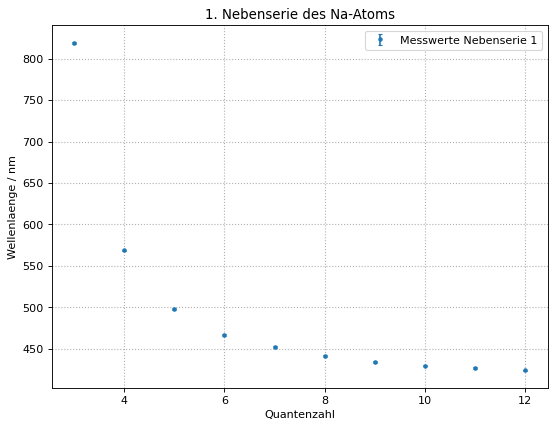

In [17]:
qz_m = np.arange(3,13)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(qz_m,lmbda_m_exp , yerr=lmbda_m_exp_err, linestyle="none",marker = ".", label="Messwerte Nebenserie 1", capsize = 2)
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('1. Nebenserie des Na-Atoms')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [18]:
def fit_func_m(m,Ry,E_3p,Delta_d):
    return hc/(Ry/(m-Delta_d)**2-E_3p)

para = [Ry,E_3p,-0.02]
popt_m, pcov_m= curve_fit(fit_func_m, qz_m, lmbda_m_exp, sigma=lmbda_m_exp_err ,p0=para)

print(lmbda_m_exp)
print(lmbda_m_exp_err)

print("Ry=",popt_m[0], ", Standardfehler=", np.sqrt(pcov_m[0][0]))
print("E_3p=",popt_m[1], ", Standardfehler=", np.sqrt(pcov_m[1][1]))
print("Delta_d=",popt_m[2], ", Standardfehler=", np.sqrt(pcov_m[2][2]))

[819.4  568.69 498.18 466.8  451.71 441.16 433.73 429.61 426.8  423.67]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ry= -12.80984673735542 , Standardfehler= 0.1810679871601931
E_3p= -3.016096770926673 , Standardfehler= 0.002744229591440165
Delta_d= 0.08074287208060656 , Standardfehler= 0.018542645218379984


In [19]:
chi2_=np.sum((fit_func_m(qz_m,*popt_m)-lmbda_m_exp)**2/lmbda_m_exp_err**2)
dof=len(qz_m)-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

chi2= 2.3968240542089343
chi2_red= 0.342403436315562
Wahrscheinlichkeit: 93.0 %


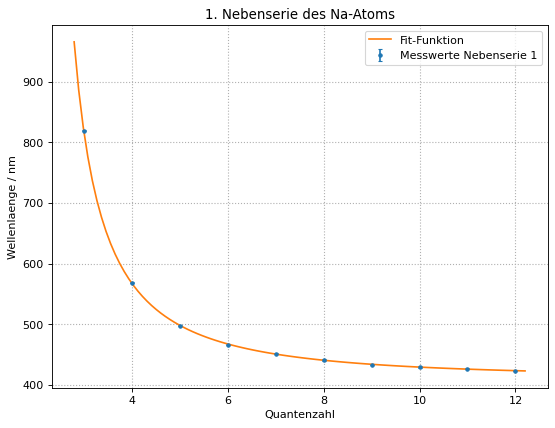

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(qz_m,lmbda_m_exp , yerr=lmbda_m_exp_err, linestyle="none",marker = ".", label="Messwerte Nebenserie 1", capsize = 2)
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_func_m(x,*popt_m), label="Fit-Funktion")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('1. Nebenserie des Na-Atoms')
plt.legend()
plt.grid(linestyle=":", linewidth=1)


In [25]:
sigma_Ry_m = (popt_m[0] - Ry) / (np.sqrt(pcov_m[0][0]))
print("Abweichung Ry:", sigma_Ry_m)

sigma_E_3p_m = (popt_m[1] - E_3p) / (np.sqrt(pcov_m[1][1]))
print("Abweichung E_3p:", sigma_E_3p_m)

Abweichung Ry: 4.391462428646201
Abweichung E_3p: 3.144136020633652


In [26]:
def fit_func_m2(m,Ry,E_3p,Delta_s):
    return hc/(Ry/(m-Delta_s)**2-E_3p)

qz_m2 = np.arange(5,10)

para = [-13.6,-3,-0.02]
popt_m2, pcov_m2= curve_fit(fit_func_m2, qz_m2, lmbda_m2_exp, sigma=lmbda_m2_exp_err ,p0=para)

print("Ry=",popt_m2[0], ", Standardfehler=", np.sqrt(pcov_m2[0][0]))
print("E_3p=",popt_m2[1], ", Standardfehler=", np.sqrt(pcov_m2[1][1]))
print("Delta_s=",popt_m2[2], ", Standardfehler=", np.sqrt(pcov_m2[2][2]))

Ry= -13.23002139068427 , Standardfehler= 0.37188187487619523
E_3p= -3.0254050326399566 , Standardfehler= 0.005193061828289982
Delta_s= 1.3815441696521982 , Standardfehler= 0.04237562753936226


In [27]:
chi2_=np.sum((fit_func_m2(qz_m2,*popt_m2)-lmbda_m2_exp)**2/lmbda_m2_exp_err**2)
dof=len(qz_m2)-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

chi2= 0.20042408203468565
chi2_red= 0.10021204101734282
Wahrscheinlichkeit: 90.0 %


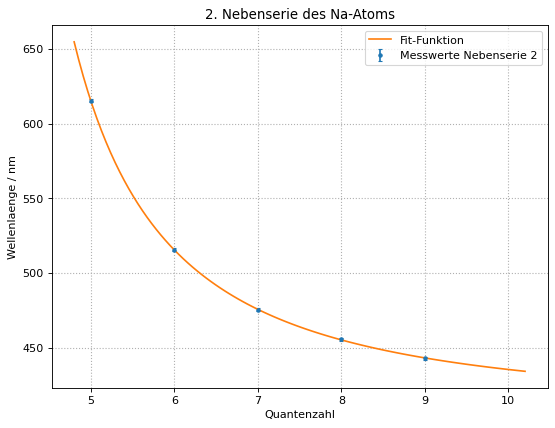

In [28]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(qz_m2,lmbda_m2_exp , yerr=lmbda_m2_exp_err, linestyle="none",marker = ".", label="Messwerte Nebenserie 2", capsize = 2)
x=np.linspace(4.8,10.2, 100)
plt.plot(x, fit_func_m2(x,*popt_m2), label="Fit-Funktion")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('2. Nebenserie des Na-Atoms')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [29]:
sigma_Ry_m2 = (popt_m2[0] - Ry) / (np.sqrt(pcov_m2[0][0]))
print("Abweichung Ry:", sigma_Ry_m2)

sigma_E_3p_m2 = np.abs((popt_m2[1] - E_3p) / (np.sqrt(pcov_m2[1][1])))
print("Abweichung E_3p:", sigma_E_3p_m2)

sigma_Delta_s = np.abs((popt_m2[2] - Delta_s) / (np.sqrt(pcov_m2[2][2])))
print("Abweichung Delta_s:", sigma_Delta_s)

Abweichung Ry: 1.00832719916927
Abweichung E_3p: 0.1309498381558724
Abweichung Delta_s: 0.23859353698848199
